<a href="https://colab.research.google.com/github/TesNikk/ML-DL/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import library

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense,Dropout,Activation,Flatten,
                                     BatchNormalization, Conv2D, MaxPooling2D)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam



#Load Dataset

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)
print("X_test shape",X_test.shape)
print("y_test shape",y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


#Reshape and Normalize input

tensorflow can handle format: (batch,height,width,channel)

In [4]:
features_train = X_train.reshape(-1,28,28,1).astype("float32")/255.0
features_test = X_test.reshape(-1,28,28,1).astype("float32")/255.0

# One hot encoding

In [5]:
targets_train = to_categorical(y_train,10)
targets_test = to_categorical(y_test,10)

#Build the CNN model

In [7]:
model = Sequential(
    [
        Conv2D(32,(3,3), input_shape=(28,28,1),activation="relu"),
        BatchNormalization(),

        Conv2D(32,(3,3),activation="relu"),
        MaxPooling2D(pool_size=(2,2)),
        BatchNormalization(),

        Conv2D(64,(3,3),activation="relu"),
        BatchNormalization(),

        Conv2D(32,(3,3),activation='relu'),
        MaxPooling2D(pool_size=(2,2)),

        Flatten(),
        BatchNormalization(),

        Dense(512,activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(10,activation='softmax')



    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Compile Model

In [8]:
model.compile(
    optimizer = Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#Data Augmentation

In [11]:
train_datagen = ImageDataGenerator(
    rotation_range = 7,
    width_shift_range=0.05,
    shear_range = 0.2,
    height_shift_range=0.07,
    zoom_range=0.05,
)

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(features_train,targets_train,batch_size = 64)
test_generator = test_datagen.flow(features_test,targets_test,batch_size=64)

#Train the model

In [12]:
model.fit(
    train_generator,
    steps_per_epoch = len(features_train) // 64,
    epochs=5,
    validation_data = test_generator,
    validation_steps=len(features_test) // 64
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


937/937 ━━━━━━━━━━━━━━━━━━━━ 189s 196ms/step - accuracy: 0.9123 - loss: 0.2789 - val_accuracy: 0.9885 - val_loss: 0.0352
Epoch 2/5
  1/937 ━━━━━━━━━━━━━━━━━━━━ 2:34 165ms/step - accuracy: 0.9844 - loss: 0.0467

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9844 - loss: 0.0467 - val_accuracy: 0.9885 - val_loss: 0.0352
Epoch 3/5
937/937 ━━━━━━━━━━━━━━━━━━━━ 202s 215ms/step - accuracy: 0.9806 - loss: 0.0615 - val_accuracy: 0.9865 - val_loss: 0.0436
Epoch 4/5
937/937 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9844 - loss: 0.0301 - val_accuracy: 0.9856 - val_loss: 0.0459
Epoch 5/5
937/937 ━━━━━━━━━━━━━━━━━━━━ 261s 221ms/step - accuracy: 0.9860 - loss: 0.0449 - val_accuracy: 0.9931 - val_loss: 0.0235


#Evaluate the model

In [14]:
score = model.evaluate(features_test, targets_test, verbose=1)
print(f'Test accuracy: {score[1]*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9914 - loss: 0.0272
Test accuracy: 99.31%


#Predict

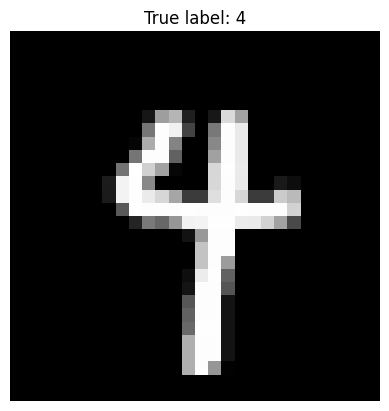

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted Label: 4
True Label: 4


In [19]:
index = 565
image = features_test[565]

# Show the image
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f"True label: {np.argmax(targets_test[index])}")
plt.axis('off')
plt.show()

# Model expects input with shape (batch_size, 28, 28, 1)
# So we add an extra dimension using np.expand_dims
prediction = model.predict(np.expand_dims(image, axis=0))

# Get the class with the highest probability
predicted_label = np.argmax(prediction)
print(f"Predicted Label: {predicted_label}")

true_label = np.argmax(targets_test[index])
print(f"True Label: {true_label}")
